
Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
if you do not add visualisation. Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master
/Data/Shopping_Revenue.csv

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv",delimiter = ',')

In [ ]:
# To show us total number of rows and columns in the given dataframe.
df.shape

(137, 43)

In [ ]:
# To show us the column names in the given dataframe.
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [ ]:
# To show us the first five records of the dataframe.
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
#This gives us details about each individual column's null values  and data-types it contains.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
# It gives us the various details about the numerical columns in the dataframe.
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
# To check whether there are any null values in the dataframe and to resolve this issue.
print('The number of null values are:',df.isnull().sum().sum())
#Filling all null values with 0.
df = df.fillna(0)
print('The number of null values are:',df.isnull().sum().sum())

The number of null values are: 8
The number of null values are: 0


In [ ]:
# This shows us the unique values contained in the 'City Group' column.
df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

<AxesSubplot:xlabel='revenue', ylabel='Density'>

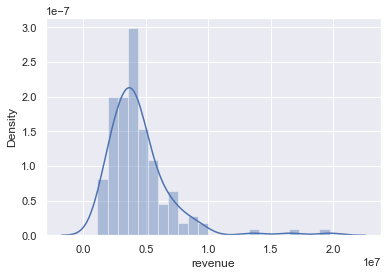

In [ ]:
# This chart shows us the distribution of the 'revenue' column.
sns.distplot(df['revenue'])

<AxesSubplot:ylabel='None'>

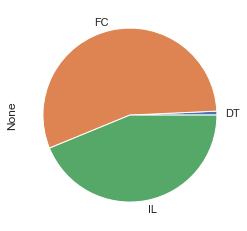

In [ ]:
# This chart is used to compare the count of unique values in the 'Type' column.
df.groupby('Type').size().plot(kind='pie')

<AxesSubplot:xlabel='revenue', ylabel='City'>

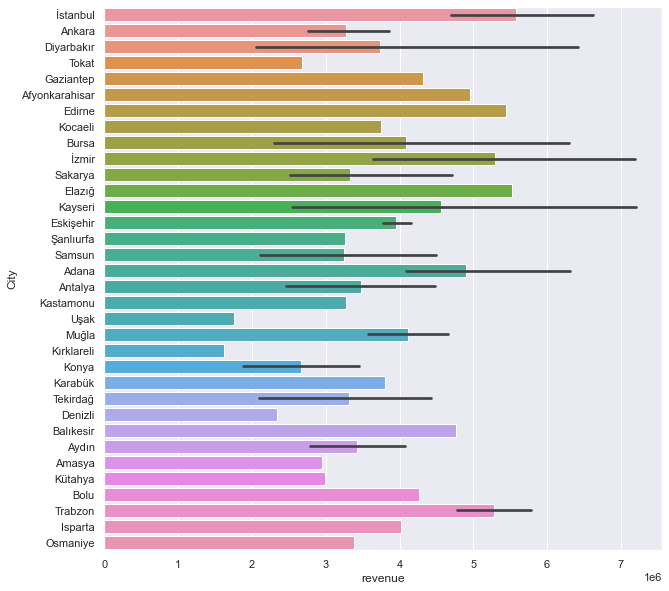

In [ ]:
#This chart shows us the total revenue earned by different cities. 
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.barplot(y = 'City', x = 'revenue', data=df)

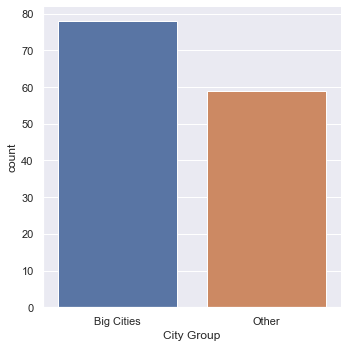

In [ ]:
# This chart is a representation of the 'City Group' column.
sns.factorplot('City Group', data=df, kind='count')

<AxesSubplot:>

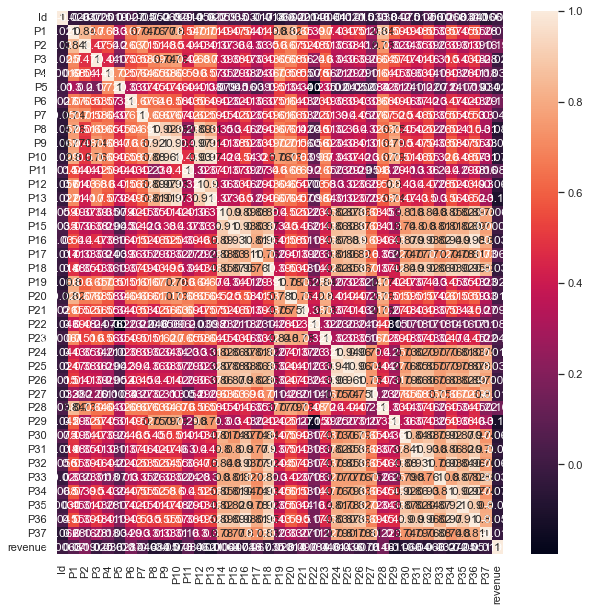

In [ ]:
# This chart helps us to visualize the strength of relationships between numerical variables.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Dropping columns of the dataframe.
df.drop(['Id','Open Date','City'], axis = 1,inplace=True)

In [ ]:
# Converting categorical data into numerical data.

import category_encoders as ce
enc = ce.OrdinalEncoder()
df['City Group']=enc.fit_transform(df['City Group'])
df['Type'] = enc.fit_transform(df['Type'])

In [ ]:
# Scaling the columns of the data in a fixed range.import sklearn
from sklearn.preprocessing import StandardScaler
ms = StandardScaler()
cols=df.columns
df= ms.fit_transform(df)
df= pd.DataFrame(df,columns=cols)

In [ ]:
# Splitting the complete data into training and test data.
from sklearn.model_selection import train_test_split
x=df.drop('revenue',axis = 1)
y=df['revenue']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Using various Machine Learning Models:

# 1) K-Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

y_pred = knr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('The score of this model is:',r2_score(y_test,y_pred))

The score of this model is: 0.10087909083075608


# 2) Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=7)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

In [ ]:
print('The score of this model is:',r2_score(y_test,y_pred))

The score of this model is: 0.09559234966626429


# 3) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [ ]:
print('The score of this model is:',r2_score(y_test,y_pred))

The score of this model is: -0.7336490825248452


# 4) Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=2)
svr.fit(x_train,y_train)

y_pred = svr.predict(x_test)

In [ ]:
print('The score of this model is:',r2_score(y_test,y_pred))

The score of this model is: -0.3957155023369745
